In [2]:
import fnmatch
import os
import pandas as pd
from os.path import isfile, join
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl

plot settings:

In [3]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'serif'

# Plotting Data 

In this notebook I will plot the data of the vertex fraction vs. magnetic field of the hysteresis loops at different mT/s rates. 

In [4]:
Data_path = "/home/carolina/Dropbox/BidisperseColloidalIce_PROJECT/data_changing_timeM"

In [8]:
inc = []
dec = []
for file in os.listdir(Data_path):
    if fnmatch.fnmatch(file, 'Bajada*.dat'):
        print(file)
        dec.append(pd.read_csv(join(Data_path,file), sep = "\t", index_col = [0,1])) 
    if fnmatch.fnmatch(file, 'Subida*.dat'):
        #print(file)
        inc.append(pd.read_csv(join(Data_path,file), sep = "\t", index_col = [0,1])) 
field_max = 200
keys_d = [500,2000,330,400,4000,2900,20000,250,280,5800,3362,970,650,200,220]
keys_s = [2900,220,5800,280,400,3362,200,650,330,970,20000,2000,250,500,4000]

Bajada500.dat
Bajada2000.dat
Bajada330.dat
Bajada400.dat
Bajada4000.dat
Bajada2900.dat
Bajada20000.dat
Bajada250.dat
Bajada280.dat
Bajada5800.dat
Bajada3362.dat
Bajada970.dat
Bajada650.dat
Bajada200.dat
Bajada220.dat


In [9]:
keys_d[:] = [round(field_max/x,2) for x in keys_d]
keys_s[:] = [round(field_max/x,2) for x in keys_s]

In [10]:
keys_s

[0.07,
 0.91,
 0.03,
 0.71,
 0.5,
 0.06,
 1.0,
 0.31,
 0.61,
 0.21,
 0.01,
 0.1,
 0.8,
 0.4,
 0.05]

In [11]:
keys_d

[0.4,
 0.1,
 0.61,
 0.5,
 0.05,
 0.07,
 0.01,
 0.8,
 0.71,
 0.03,
 0.06,
 0.21,
 0.31,
 1.0,
 0.91]

In [12]:
inc = pd.concat(inc, keys = keys_s)
dec = pd.concat(dec, keys = keys_d)

In [13]:
dec.index.names = ['change_m_time', 'field', 'type']
inc.index.names = ['change_m_time', 'field', 'type']

In [14]:
dec

mean       err
change_m_time field type                     
0.40          0.0   Type 1  0.00375  0.000932
                    Type 2  0.25375  0.004703
                    Type 3  0.28450  0.010191
                    Type 4  0.21575  0.005822
                    Type 5  0.22150  0.005764
...                             ...       ...
0.91          200.0 Type 2  0.20200  0.006155
                    Type 3  0.42350  0.013240
                    Type 4  0.17550  0.004784
                    Type 5  0.18650  0.005017
                    Type 6  0.01025  0.001557

[4500 rows x 2 columns]

Now, I will filter only the data of the type 3 vertices.

In [15]:
dec = dec[np.in1d(dec.index.get_level_values(2), ['Type 3'])]
inc = inc[np.in1d(inc.index.get_level_values(2), ['Type 3'])]

In [16]:
dec

mean       err
change_m_time field      type                      
0.40          0.000000   Type 3  0.284500  0.010191
              4.081633   Type 3  0.288878  0.009731
              8.163265   Type 3  0.293689  0.008680
              12.244898  Type 3  0.298985  0.007398
              16.326531  Type 3  0.306730  0.008640
...                                   ...       ...
0.91          183.673469 Type 3  0.379612  0.006685
              187.755102 Type 3  0.393194  0.007588
              191.836735 Type 3  0.403296  0.008822
              195.918367 Type 3  0.413398  0.010820
              200.000000 Type 3  0.423500  0.013240

[750 rows x 2 columns]

In [17]:
dec = dec.sort_index(0)
inc = inc.sort_index(0)

In [18]:
#dec.to_csv('vertex_pop_type3_from200mT_to_0mT.dat', sep = '\t')
#inc.to_csv('vertex_pop_type3_from0mT_to_200mT.dat', sep = '\t')

In [19]:
dec

mean       err
change_m_time field      type                      
0.01          0.000000   Type 3  0.423750  0.012446
              4.081633   Type 3  0.424252  0.011167
              8.163265   Type 3  0.411837  0.009724
              12.244898  Type 3  0.381480  0.015087
              16.326531  Type 3  0.389167  0.007380
...                                   ...       ...
1.00          183.673469 Type 3  0.429885  0.007723
              187.755102 Type 3  0.434088  0.007517
              191.836735 Type 3  0.435746  0.007863
              195.918367 Type 3  0.437404  0.008842
              200.000000 Type 3  0.439063  0.010275

[750 rows x 2 columns]

Text(0.5, 0.9, 'b)')

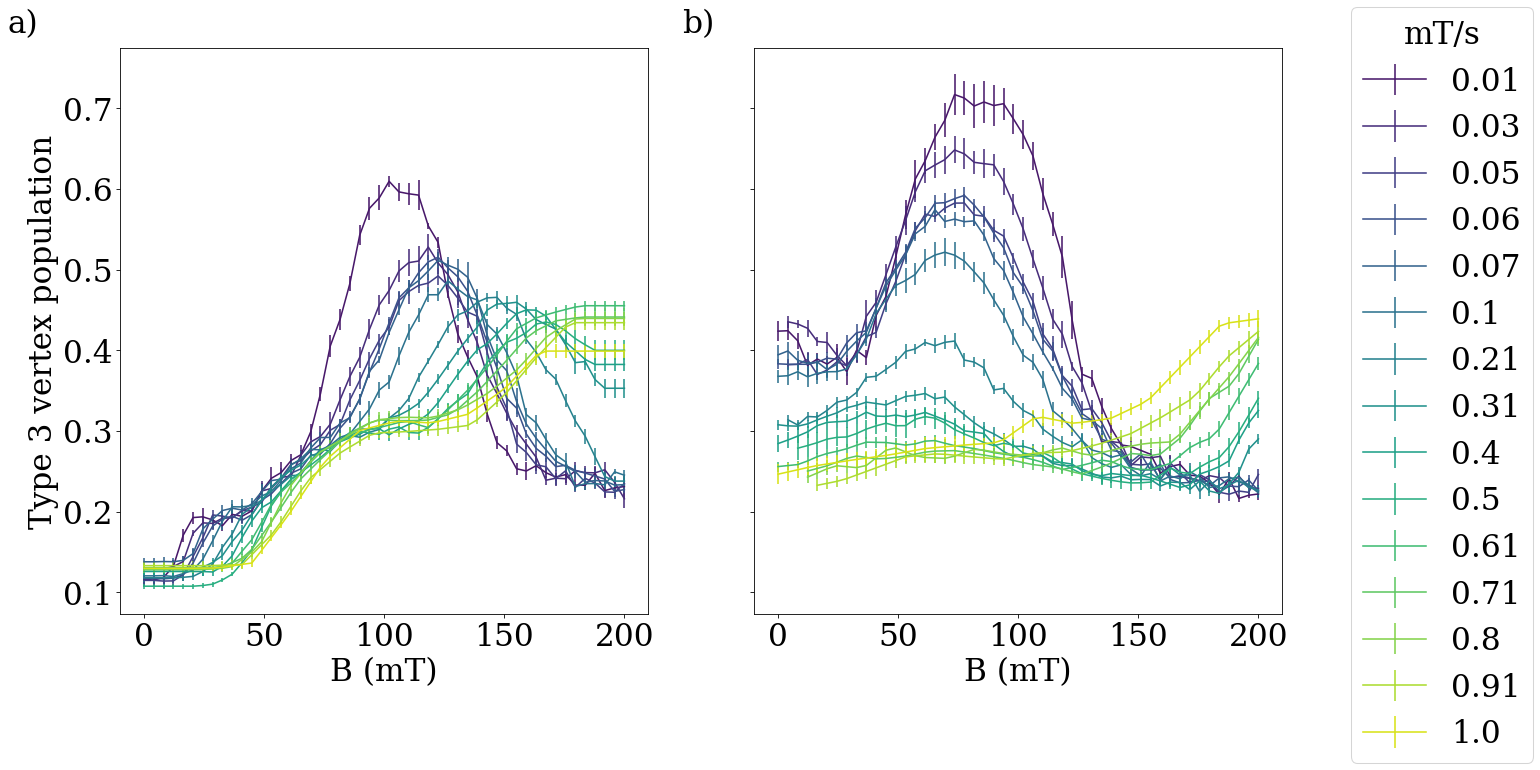

In [20]:
fig, ax = plt.subplots(1,2, figsize = (20,10), sharey=True)
cmap = sns.color_palette("viridis", n_colors=len(keys_d))


dec_data = dec.groupby('change_m_time')
inc_data = inc.groupby('change_m_time')

for i, (n, gr) in enumerate(inc_data):
    ax[0].errorbar(gr.index.get_level_values("field"), gr["mean"],yerr = gr['err'], color=cmap[i],label = n, fmt = '-')

for i_dec, (n_dec, gr_dec) in enumerate(dec_data):
    ax[1].errorbar(gr_dec.index.get_level_values("field"), gr_dec["mean"],yerr = gr_dec['err'], color=cmap[i_dec],label = n_dec)

ax[0].tick_params(axis='y', labelsize=30)
ax[0].tick_params(axis='x', labelsize=30) 
ax[1].tick_params(axis='y', labelsize=30)
ax[1].tick_params(axis='x', labelsize=30) 
# ax[0].set_title('From 0 mT to 200 mT', size = 30)
# ax[1].set_title('From 200 mT to 0 mT', size = 30)
ax[1].set_xlabel('B (mT)', size = 30)
ax[0].set_xlabel('B (mT)', size = 30)
ax[0].set_ylabel('Type 3 vertex population', size = 30)

plt.legend(bbox_to_anchor=(1.1, 1.1), title = 'mT/s',fontsize = 30, title_fontsize = 30)
plt.figtext(0.05,0.9,'a)', size = 30)
plt.figtext(0.5,0.9,'b)', size = 30)
#plt.savefig('BidisperseIce_hysteresis_loop_type_diffrate_err', bbox_inches='tight')

In [3]:
200/2000

0.1